In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 
from statsmodels.graphics.regressionplots import influence_plot

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Problem Statement

### Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

## Read Dataset

In [2]:
Startups_Data = pd.read_csv('50_Startups.csv')
Startups_Data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
Startups_Data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


## EDA

In [4]:
Startups_Data.shape

(50, 5)

In [5]:
Startups_Data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
Startups_Data = Startups_Data.rename(columns = {'R&D Spend' : 'RnD_Spend', 'Marketing Spend' : 'Marketing_Spend'})
Startups_Data.columns

Index(['RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [7]:
Startups_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RnD_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
Startups_Data.describe()

,RnD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
Startups_Data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
Startups_Data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [11]:
Startups_Data.isna().sum()

RnD_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [61]:
Startups_Data[Startups_Data.duplicated()]

,RnD_Spend,Administration,Marketing_Spend,Profit


### State column will not going to add any value in our predictions so we can drop that column.

In [13]:
Startups_Data = Startups_Data.drop('State', axis=1)
Startups_Data.head()

,RnD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## Visualization

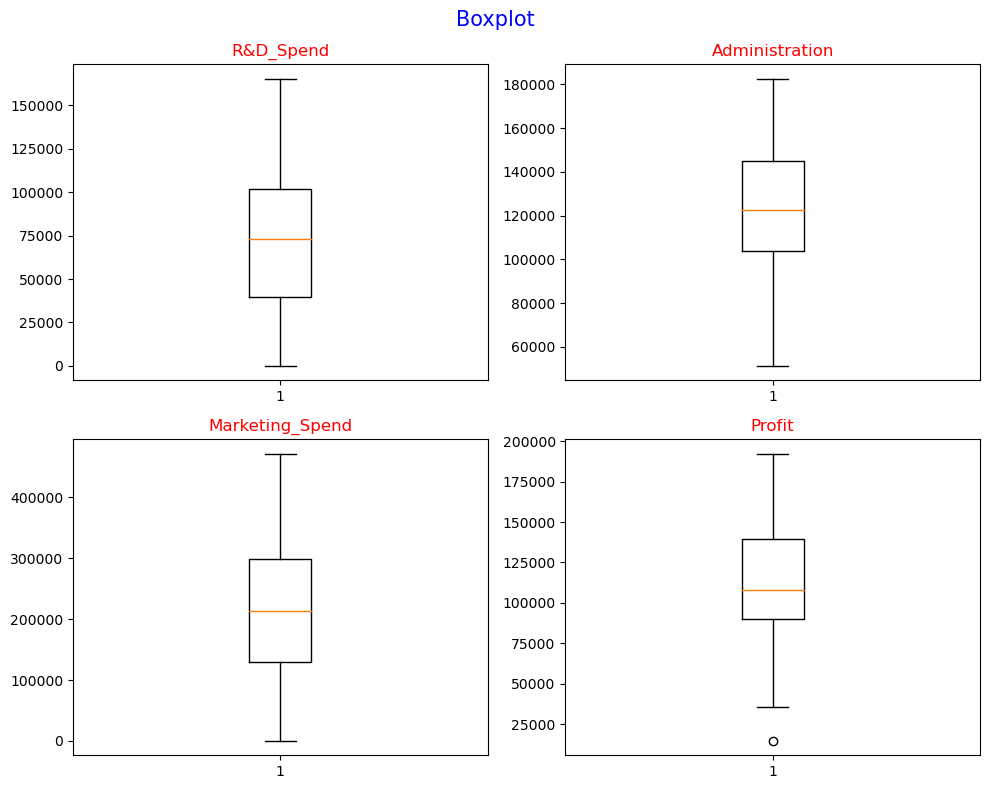

In [14]:
# Boxplot
plt.figure(figsize = (10,8));
plt.suptitle('Boxplot', color='b', size=15)
plt.subplot(2,2,1)
plt.title('R&D_Spend', color = 'r')
plt.boxplot(Startups_Data['RnD_Spend']);
plt.subplot(2,2,2)
plt.boxplot(Startups_Data['Administration']);
plt.title('Administration', color='r')
plt.subplot(2,2,3)
plt.title('Marketing_Spend', color = 'r')
plt.boxplot(Startups_Data['Marketing_Spend'])
plt.subplot(2,2,4)
plt.title('Profit', color = 'r')
plt.boxplot(Startups_Data['Profit'])
plt.tight_layout()

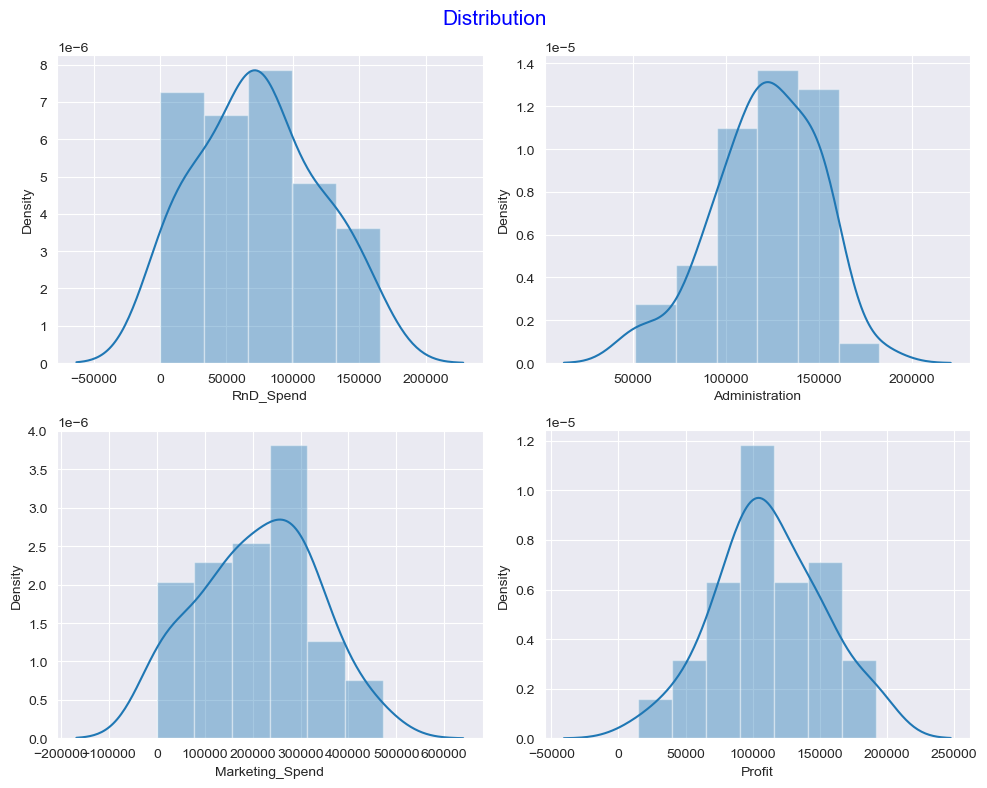

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,8))
plt.suptitle('Distribution', color='b', size=15)
plt.subplot(2,2,1)
#plt.title('R&D_Spend', color='r')
sns.distplot(Startups_Data['RnD_Spend'])
plt.subplot(2,2,2)
#plt.title('Administration', color='r')
sns.distplot(Startups_Data['Administration'])
plt.subplot(2,2,3)
#plt.title('Marketing_Spend', color='r')
sns.distplot(Startups_Data['Marketing_Spend'])
plt.subplot(2,2,4)
#plt.title('Profit', color='r')
sns.distplot(Startups_Data['Profit'])
plt.tight_layout()

## Correlation Matrix

In [16]:
Startups_Data.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


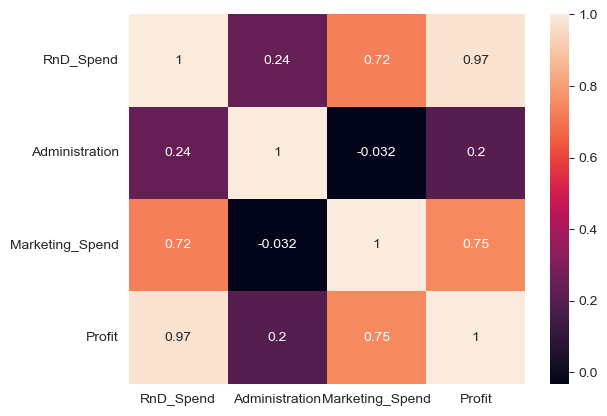

In [17]:
sns.heatmap(Startups_Data.corr(), annot=True);

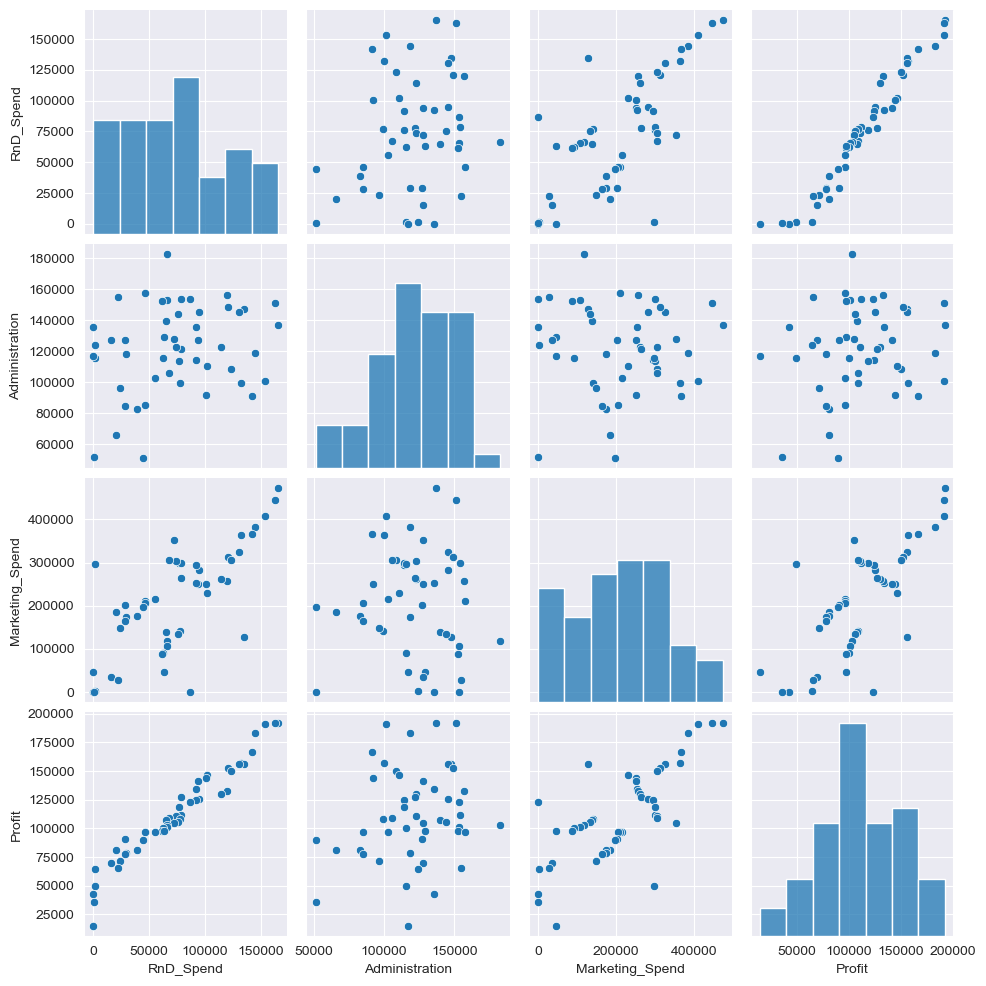

In [18]:
sns.pairplot(Startups_Data);

R&D_Spend and Profit shows strong positive correlation.

## Model Building

- Dependent Variable = Profit
- Independent variable = R&D_Spend, Adminstration, Marketing_Spend.

In [19]:
import statsmodels.formula.api as smf
model = smf.ols("Profit ~ Administration+RnD_Spend+Marketing_Spend", data=Startups_Data).fit()

In [20]:
model.params

Intercept          50122.192990
Administration        -0.026816
RnD_Spend              0.805715
Marketing_Spend        0.027228
dtype: float64

In [21]:
print('t-values = ','\n', round(model.tvalues, 5))
print('p-values = ','\n', round(model.pvalues, 5))

t-values =  
 Intercept           7.62622
Administration     -0.52551
RnD_Spend          17.84637
Marketing_Spend     1.65508
dtype: float64
p-values =  
 Intercept          0.00000
Administration     0.60176
RnD_Spend          0.00000
Marketing_Spend    0.10472
dtype: float64


In [22]:
print('R-Squared = ', round(model.rsquared,4))
print('Adj_R-Squared = ', round(model.rsquared_adj, 4))

R-Squared =  0.9507
Adj_R-Squared =  0.9475


- In Pairplot we can see that there is less correlation between our indipendent and dependent variables except RnD_Spend.
- p-values for Administration and Marketing_spend is more than alpha(0.05).
- So we will build SLR And MLR model for Administration & Marketing_Spend. 

In [23]:
# SLR model for Administration
model_admin = smf.ols('Profit~Administration', data=Startups_Data).fit()

In [24]:
# t-Values & p-Values
print('t-values = ','\n', model_admin.tvalues)
print('p-values = ','\n', model_admin.pvalues)

t-values =  
 Intercept         3.040044
Administration    1.419493
dtype: float64
p-values =  
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [25]:
# SLR model for Marketing_Spend
model_mkts = smf.ols('Profit~Marketing_Spend', data=Startups_Data).fit()

In [26]:
# t-Values & p-Values
print('t-values = ','\n', model_mkts.tvalues)
print('p-values = ','\n', model_mkts.pvalues)

t-values =  
 Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64
p-values =  
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [27]:
# MLR model for Administration and Marketing_Spend
model_admin_mkts = smf.ols('Profit~Administration+Marketing_Spend', data=Startups_Data).fit()

In [28]:
# t-Values & p-Values
print('t-values = ','\n', model_admin_mkts.tvalues)
print('p-values = ','\n', model_admin_mkts.pvalues)

t-values =  
 Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64
p-values =  
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


## Model Validation

### 1) Collinearity check
- Check collinearity for all independent variables.
- VIF = 1/(1-rsquared)

In [29]:
# VIF for R&D_Spend
rsq_RnD = smf.ols('RnD_Spend~Administration+Marketing_Spend', data=Startups_Data).fit().rsquared
vif_RnD = 1/(1-rsq_RnD)

# VIF for Administration
rsq_Admin = smf.ols('Administration~RnD_Spend+Marketing_Spend', data=Startups_Data).fit().rsquared
vif_Admin = 1/(1-rsq_Admin)

# VIF for Marketing_Spend
rsq_mkts = smf.ols('Marketing_Spend~RnD_Spend+Administration', data=Startups_Data).fit().rsquared
vif_mkts = 1/(1-rsq_mkts)

VIF_values = pd.DataFrame()
VIF_values['Variables'] = ['RnD_Spend','Administrator','Marketing_Spend']
VIF_values['VIF'] = [vif_RnD,vif_Admin,vif_mkts]
VIF_values

,Variables,VIF
0,RnD_Spend,2.468903
1,Administrator,1.175091
2,Marketing_Spend,2.326773


Here VIF Values are less. So we can take all parameters for model building.

## Residual Analysis

### 1) Test for Normality of Residuals (Q-Q Plot)

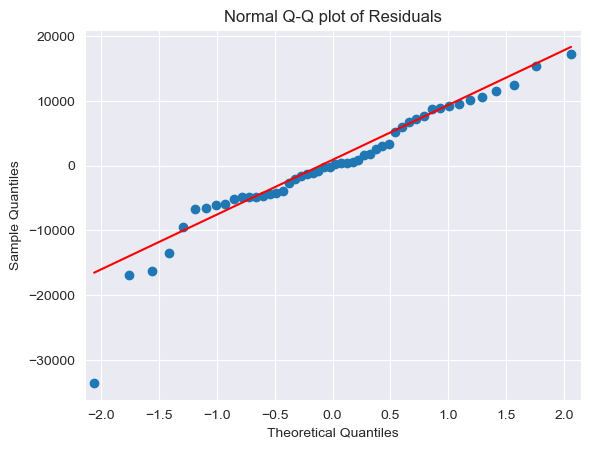

In [30]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

In [31]:
list(np.where(model.resid < (-30000)))

[array([49], dtype=int64)]

### 2) Residual Plot for Homoscedasticity or Hetroscedasticity

In [32]:
def get_standardized_values(vals) :
    return(vals - vals.mean())/vals.std()

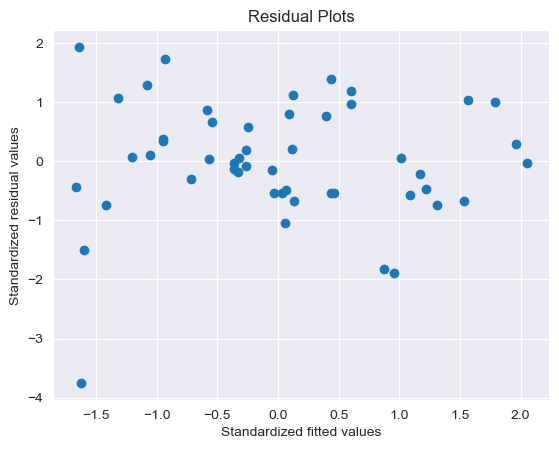

In [33]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual Plots')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

- By looking above graph we can say that this model follows Homoscedasticity

### 3) Residual vs Regressors

eval_env: 1


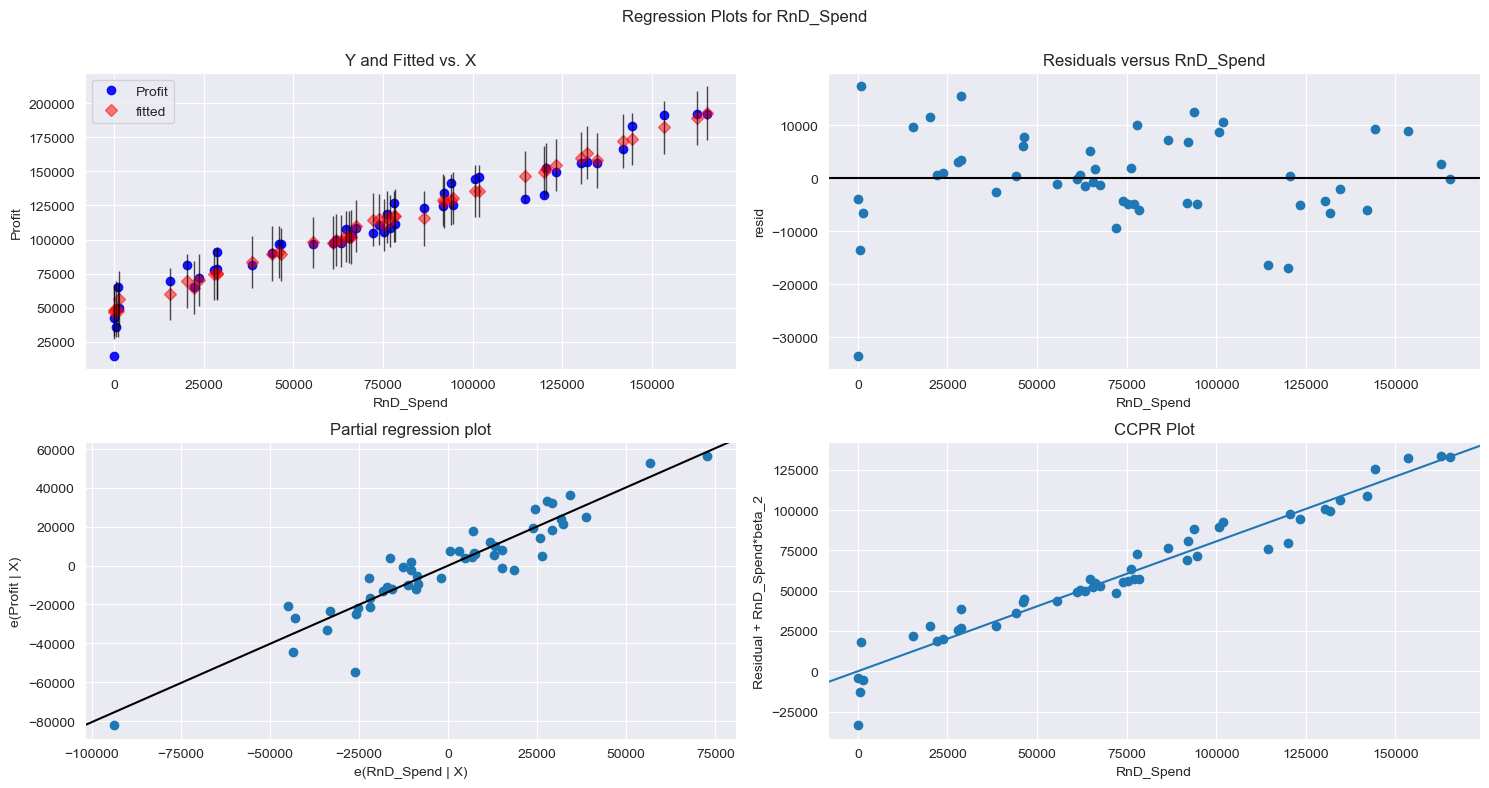

In [34]:
fig = plt.figure(figsize = (15,8));
fig = sm.graphics.plot_regress_exog(model, 'RnD_Spend', fig=fig);
plt.show()

eval_env: 1


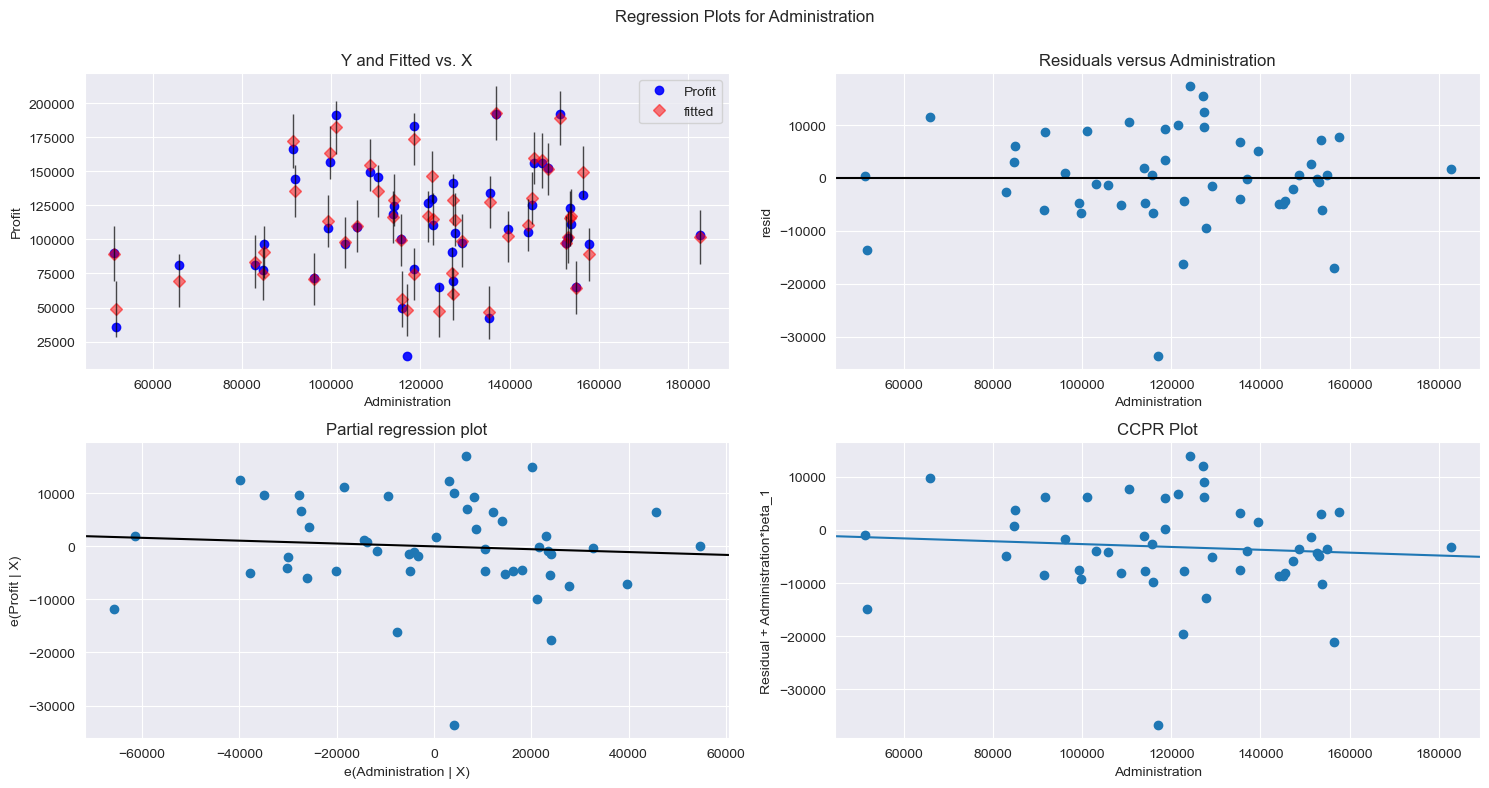

In [35]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Administration', fig=fig)
plt.show()

eval_env: 1


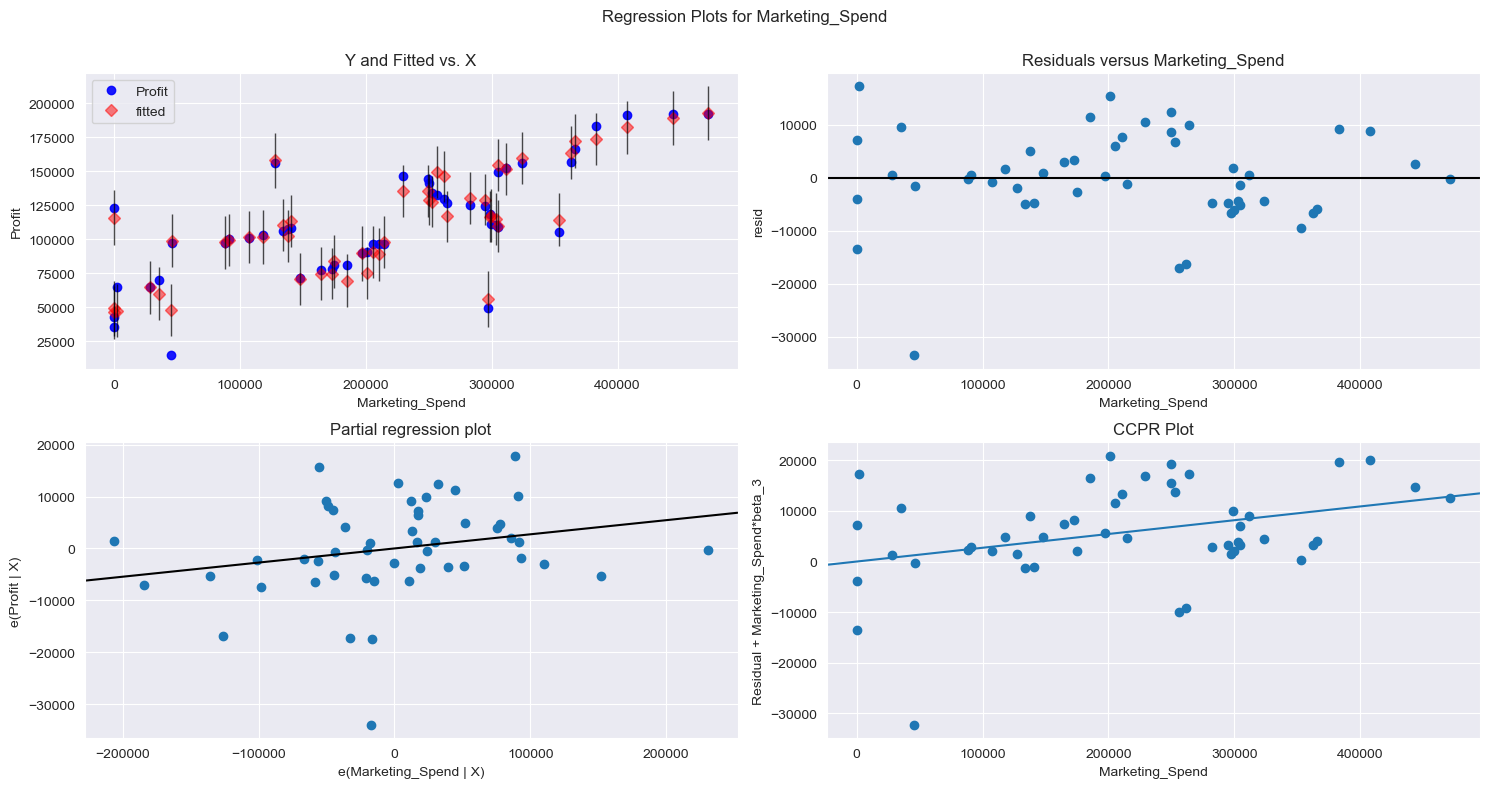

In [36]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Marketing_Spend', fig=fig)
plt.show()

## Model Deletion Diagnostics (for detecting influencers and outliers)

### 1) Cook's Distance

In [37]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

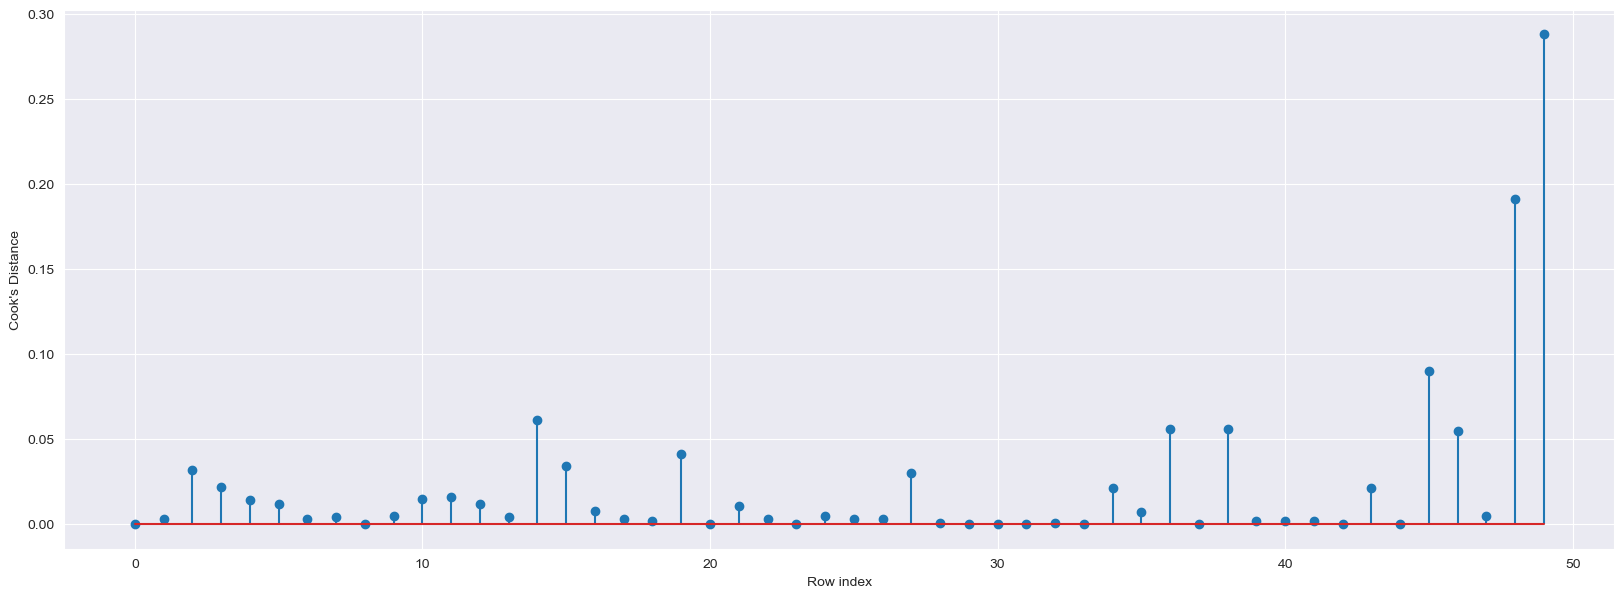

In [38]:
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(Startups_Data)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [39]:
# Index and value of influencers.
(np.argmax(c), np.max(c))

(49, 0.2880822927543255)

### 2) Liverage value using high influence point

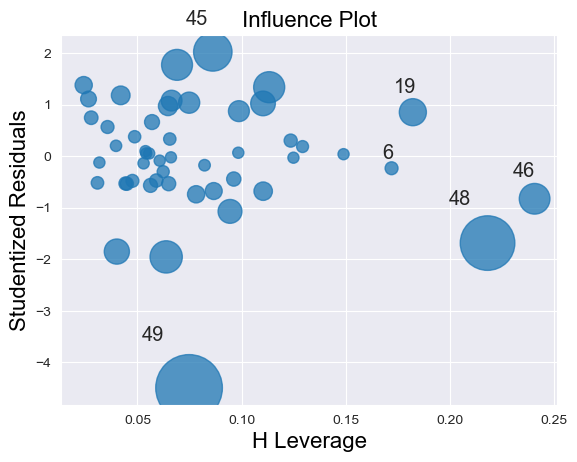

In [40]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [41]:
k = Startups_Data.shape[1]
n = Startups_Data.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.30000000000000004

- No data point has leverage_cutoff value more than 0.30.

In [42]:
# Outlier/Influencer
Startups_Data[Startups_Data.index.isin([49])]

,RnD_Spend,Administration,Marketing_Spend,Profit
49,0.0,116983.8,45173.06,14681.4


## Improving the model

In [43]:
# Removing the outlier/Influencers and rearrenging the index.
Startups_Data_new = Startups_Data.drop(Startups_Data.index[49], axis=0).reset_index(drop=True)

In [44]:
Startups_Data_new.shape

(49, 4)

In [45]:
Startups_Data_new.tail()

,RnD_Spend,Administration,Marketing_Spend,Profit
44,22177.74,154806.14,28334.72,65200.33
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41


### Building new model

In [46]:
model_new = smf.ols("Profit ~ RnD_Spend+Administration+Marketing_Spend", data=Startups_Data_new).fit()

In [47]:
print('rsquared = ', round(model_new.rsquared, 4))
print('Adj_rsquared = ', round(model_new.rsquared_adj, 4))

rsquared =  0.9613
Adj_rsquared =  0.9587


In [48]:
# Cook's Distance
model_influence_1 = model_new.get_influence()
(c, _) = model_influence_1.cooks_distance

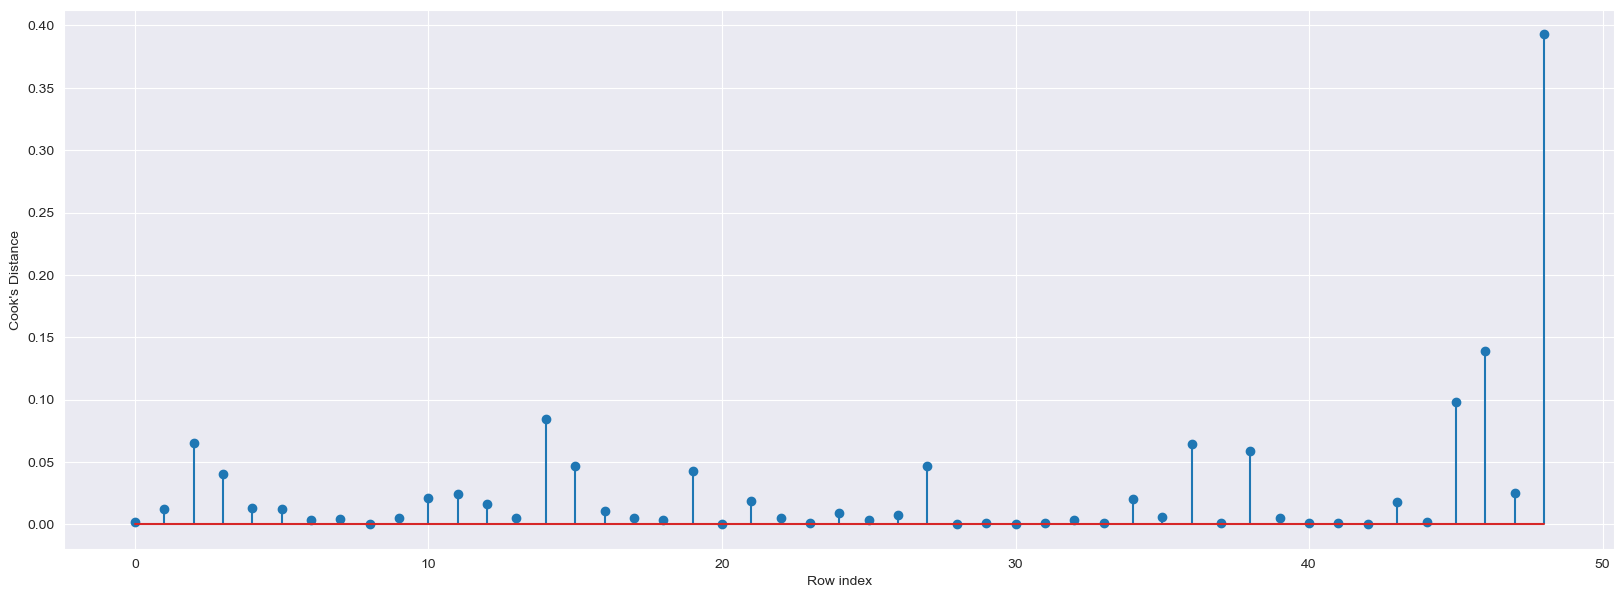

In [49]:
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(Startups_Data_new)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [50]:
(np.argmax(c), np.max(c))

(48, 0.39274420556321554)

In [51]:
# Outlier/Influencer
Startups_Data[Startups_Data.index.isin([48])]

,RnD_Spend,Administration,Marketing_Spend,Profit
48,542.05,51743.15,0.0,35673.41


In [52]:
# Removing the outlier/Influencers and rearrenging the index.
Startups_Data_new1 = Startups_Data_new.drop(Startups_Data_new.index[48], axis=0).reset_index(drop=True)

In [53]:
Startups_Data_new1.shape

(48, 4)

In [54]:
Startups_Data_new1.tail()

,RnD_Spend,Administration,Marketing_Spend,Profit
43,15505.73,127382.30,35534.17,69758.98
44,22177.74,154806.14,28334.72,65200.33
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73


In [55]:
# Building new model to improve rsquared value
model_new_1 = smf.ols("Profit ~ RnD_Spend+Administration+Marketing_Spend", data=Startups_Data_new1).fit()

In [56]:
print('rsquared = ', round(model_new_1.rsquared, 4))
print('rsquared_adj = ', round(model_new_1.rsquared_adj, 4))

rsquared =  0.9627
rsquared_adj =  0.9601


- In this model we get both rsquared and adjusted rsquared value is more than 0.95 so we can stop this process here, and use this model for predictions.

In [57]:
# R-squared values chart
Adj_rsquared = pd.DataFrame()
Adj_rsquared['Model_Name'] = ['model', 'model_new', 'model_new_1']
Adj_rsquared['rsquared_Values'] = [model.rsquared, model_new.rsquared, model_new_1.rsquared]
Adj_rsquared['Adj_rsquared_Values'] = [model.rsquared_adj, model_new.rsquared_adj, model_new_1.rsquared_adj]
Adj_rsquared

,Model_Name,rsquared_Values,Adj_rsquared_Values
0,model,0.950746,0.947534
1,model_new,0.961316,0.958737
2,model_new_1,0.962677,0.960132


## Model Prediction

### Example

In [58]:
Predictions = pd.DataFrame()
Predictions['RnD_Spend'] = [160000,150000,145000,130000]
Predictions['Administration'] = [170000,163500,154520,14650]
Predictions['Marketing_Spend'] = [450000,500000,400000,350000]
Predictions

,RnD_Spend,Administration,Marketing_Spend
0,160000,170000,450000
1,150000,163500,500000
2,145000,154520,400000
3,130000,14650,350000


In [59]:
Predictions['Predicted_Profit'] = round(model_new_1.predict(Predictions),2)
Predictions

,RnD_Spend,Administration,Marketing_Spend,Predicted_Profit
0,160000,170000,450000,182251.08
1,150000,163500,500000,175612.64
2,145000,154520,400000,170544.55
3,130000,14650,350000,166718.01


In [60]:
Startups_Data_new1['Predicted_Profit'] = round(model_new_1.predict(Startups_Data_new1),2)
Startups_Data_new1

,RnD_Spend,Administration,Marketing_Spend,Profit,Predicted_Profit
0,165349.20,136897.80,471784.10,192261.83,188939.28
1,162597.70,151377.59,443898.53,191792.06,185378.58
2,153441.51,101145.55,407934.54,191050.39,180724.35
3,144372.41,118671.85,383199.62,182901.99,172036.18
4,142107.34,91391.77,366168.42,166187.94,171688.34
5,131876.90,99814.71,362861.36,156991.12,163022.00
6,134615.46,147198.87,127716.82,156122.51,158209.61
7,130298.13,145530.06,323876.68,155752.60,158220.91
8,120542.52,148718.95,311613.29,152211.77,150109.70
9,123334.88,108679.17,304981.62,149759.96,154738.69


## =======================================================================